In [1]:
import tensorflow 
import cv2
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
img=cv2.imread('test_data/Closed_Eyes/s0005_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)

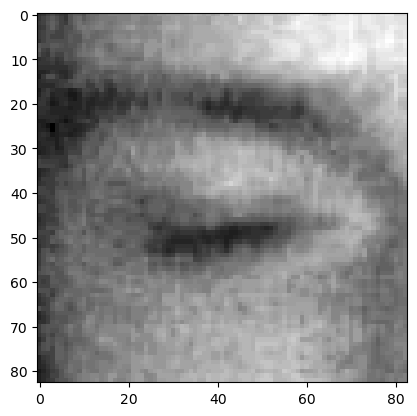

In [3]:
plt.imshow(img,cmap='gray')

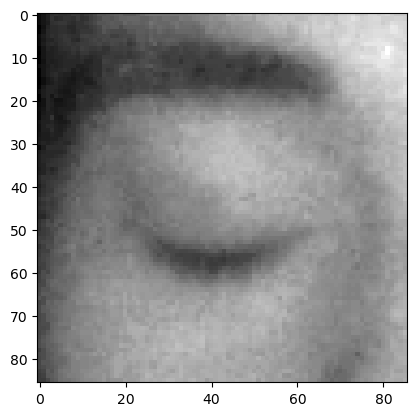

In [4]:
Datadirectory="Train_data/"
Classes=["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        backtorgb=cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

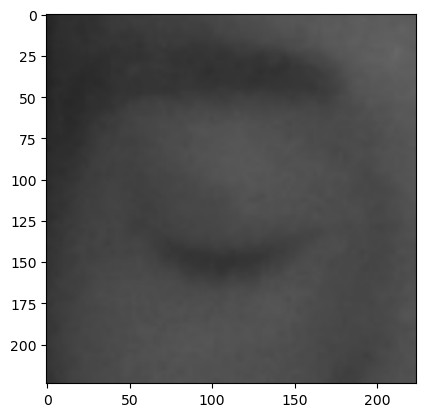

In [5]:
img_size=224

new_array=cv2.resize(backtorgb,(img_size,img_size))
plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path= os.path.join(Datadirectory, category) 
        class_num= Classes.index(category) 
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2. IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array= cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array,class_num]) 
            except Exception as e:
                pass


In [7]:
create_training_Data()

In [8]:
import random
random.shuffle(training_Data)

In [9]:
X=[]
y=[]
for features,label in training_Data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [10]:
X.shape

(7038, 224, 224, 3)

In [11]:
print(len(training_Data))

7038


In [12]:
X=X/255.0

In [13]:
Y=np.array(y)

In [14]:
import pickle

pickle_out = open("X.pickle", "wb") 
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out) 
pickle_out.close()

In [15]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [16]:
import tensorflow as tf
from tensorflow import keras  
from tensorflow.keras import layers  

In [17]:
model=tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [19]:
base_input=model.layers[0].input

In [20]:
base_output =model.layers[-4].output

In [21]:
Flat_layer=layers.Flatten()(base_output) 
final_output= layers.Dense(1)(Flat_layer) 

final_ouput=layers.Activation('sigmoid')(final_output)

In [22]:
new_model=keras.Model(inputs = base_input, outputs =final_output)

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 14, 14, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 14, 14, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 14, 14, 512)       0         
                                                                 
 conv_pw_9 (Conv2D)          (None, 14, 14, 512)       262144    
                                                                 
 conv_pw_9

In [24]:
new_model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])

In [25]:
new_model.fit(X,Y,epochs=2,validation_split=0.1)

Epoch 1/2
198/198 [==============================] - 737s 4s/step - loss: 1.5631 - accuracy: 0.8930 - val_loss: 2.7625 - val_accuracy: 0.8196
Epoch 2/2
198/198 [==============================] - 719s 4s/step - loss: 0.7009 - accuracy: 0.9522 - val_loss: 0.7487 - val_accuracy: 0.9474


In [26]:
img_array = cv2.imread('test_data/Open_Eyes/s0003_00561_0_0_1_0_0_01.png', cv2.IMREAD_GRAYSCALE) 
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB) 
new_arrays=cv2.resize(backtorgb, (img_size, img_size))

In [27]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [28]:
X_input.shape

(1, 224, 224, 3)

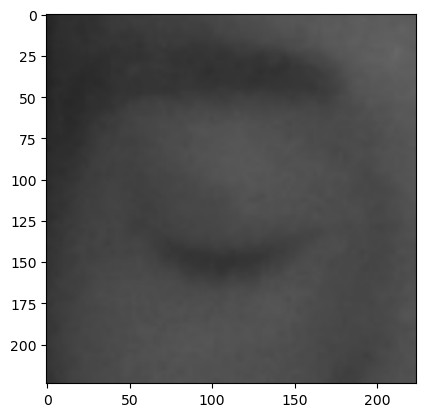

In [29]:
plt.imshow(new_array)

In [30]:
X_input=X_input/255.0
pred=new_model.predict(X_input)
pred

1/1 [==============================] - 1s 1s/step


array([[-28.091366]], dtype=float32)

In [32]:
import cv2
import numpy as np
import winsound

frequency = 2500
duration = 1000

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye_tree_eyeglasses.xml")

cap = cv2.VideoCapture(0)  # Use webcam index 0

if not cap.isOpened():
    raise IOError("Cannot open webcam")

counter = 0

while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    faces = faceCascade.detectMultiScale(gray, 1.1, 4)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        
        eyes = eyeCascade.detectMultiScale(roi_gray)
        
        if len(eyes) == 0:
            print("Eyes are not detected")
        else:
            for (ex, ey, ew, eh) in eyes:
                eyes_roi = roi_color[ey:ey + eh, ex:ex + ew]
                final_image = cv2.resize(eyes_roi, (224, 224))
                final_image = np.expand_dims(final_image, axis=0)
                final_image = final_image / 255.0
                
                # You need to define and load your 'new_model' here
                predictions = new_model.predict(final_image)
                
                if predictions < 0:
                    status = "Open Eyes"
                    counter = 0
                else:
                    counter += 1
                    status = "Closed Eyes"
                    
                    if counter > 5:
                        cv2.putText(frame, "Sleep Alert!!", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
                        winsound.Beep(frequency, duration)
                        counter = 0
                
                cv2.putText(frame, status, (x, y - 50), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
        
    cv2.imshow('Drowsiness Detection', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 95ms/step
Eyes are not detected
1/1 [==============================] - 0s 95ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 126ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 79ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 41ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 47ms/step
Eyes 

1/1 [==============================] - 0s 94ms/step
Eyes are not detected
1/1 [==============================] - 0s 96ms/step
Eyes are not detected
1/1 [==============================] - 0s 46ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 56ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 53ms/step
Eyes are not detected
1/1 [==============================] - 0s 48ms/step
Eyes are not detected
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 49ms/step
Eyes are not detected
Eyes are not detected
1/1 [==============================] - 0s 48ms/step
Eyes are not detected
Eyes are not

KeyboardInterrupt: 